In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = r"C:\Users\Jaivansh Chawla\Documents\COLLEGE\3 YEAR\5 sem\ML\ML LAB\LAB 9\UCI_HAR_dataset.csv"
df = pd.read_csv(path)
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head(), "\n")

✅ Dataset Loaded Successfully!
Shape: (2947, 563)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBo

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [6]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train_encoded)
print("🚀 Model Training Complete!\n")

🚀 Model Training Complete!



In [7]:
y_pred = model.predict(X_test)

In [8]:
print("🎯 Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\n📊 Classification Report:\n", classification_report(
    y_test_encoded, y_pred, target_names=le.classes_
))

🎯 Accuracy: 0.9887005649717514

📊 Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       170
           SITTING       0.98      0.97      0.98       152
          STANDING       0.97      0.98      0.97       137
           WALKING       0.99      1.00      0.99       154
WALKING_DOWNSTAIRS       1.00      0.98      0.99       123
  WALKING_UPSTAIRS       0.99      0.99      0.99       149

          accuracy                           0.99       885
         macro avg       0.99      0.99      0.99       885
      weighted avg       0.99      0.99      0.99       885



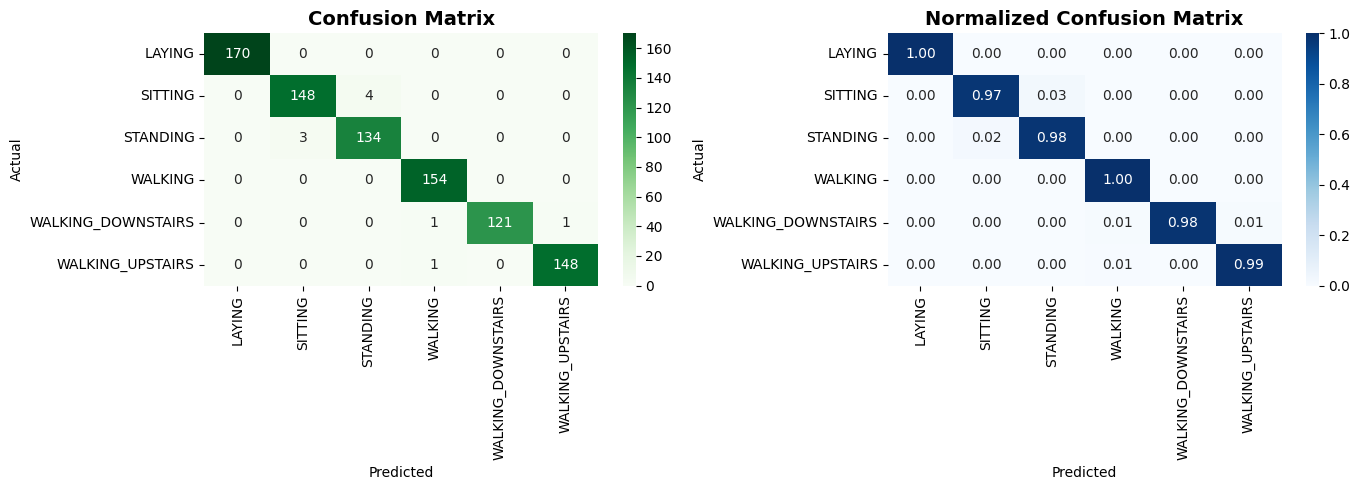

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", ax=axes[0],xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", ax=axes[1],xticklabels=le.classes_, yticklabels=le.classes_)
axes[1].set_title("Normalized Confusion Matrix", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()